# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Gaussian field

In [6]:
IMG_SIZE = (50, 50)
points = np.moveaxis(np.indices(IMG_SIZE), 0, -1).reshape(-1, 2).astype(np.float32)

## 2D

### Correlation function definition

In [7]:
def K(r, a=1):
    return np.exp(-r/a)

### Stupid sampling

In [9]:
@interact(correlation_scale=(1, 100), n=(1, 10), level=(0, 1, 0.1))
def plot_fields(correlation_scale=1000, n=5, level=0.3):
    D = np.linalg.norm(points.reshape(1, -1, 2) - points.reshape(-1, 1, 2), axis=-1)
    B = K(D, a=correlation_scale)
    A = np.linalg.cholesky(B)
    fig, ax = plt.subplots(2, n, figsize=(20, 7))
    for i in range(n):
        normals = np.random.randn(np.prod(IMG_SIZE))
        u = (A @ normals).reshape(IMG_SIZE)
        u = (u - u.min()) / (u.max() - u.min())
        ax[0][i].imshow(u, cmap='PuOr')
        # ax[0][i].set_title(f'Range [{u.min():.2f}, {u.max():.2f}]')
        # plot leveel set of u
        ax[1][i].contour(u, levels=[level])

interactive(children=(IntSlider(value=100, description='correlation_scale', min=1), IntSlider(value=5, descrip…

### Sampling with prior knowledge

#### Training data initialization

In [10]:
given_points = np.array([[i, j] for i in range (1, 50) for j in range(1, 50) if i < 10 or i > 40])
given_values = np.zeros(len(given_points))

#### Use the training data to build and train a GPR

In [11]:
def min_max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

gp = GaussianProcessRegressor(RBF(4, length_scale_bounds='fixed'))
gp.fit(given_points, given_values)
predicted = gp.sample_y(points, n_samples=5).reshape(*IMG_SIZE, 5).transpose(2, 0, 1)

predicted = np.array([min_max_normalize(x) for x in predicted])

#### Plot results

In [14]:
@interact(level=(0, 1, 0.1))    
def show_predicted(level=0.5):
    fig, ax = plt.subplots(2, 5, figsize=(25, 10))
    for i in range(5):
        ax[0][i].imshow(predicted[i], vmin=0, vmax=1, cmap='PuOr', origin='lower')
        ax[1][i].contour(predicted[i], levels=[level])

interactive(children=(FloatSlider(value=0.5, description='level', max=1.0), Output()), _dom_classes=('widget-i…

# _

In [11]:
# PLot random gaussian field 2d
from scipy.stats import multivariate_normal
def plot_gaussian_field_2d(mean, cov, n=100):
    x = np.linspace(-1, 1, n)
    y = np.linspace(-1, 1, n)
    X, Y = np.meshgrid(x, y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    rv = multivariate_normal(mean, cov)
    plt.contourf(X, Y, rv.pdf(pos))
    plt.colorbar()
    plt.show()




In [ ]:
@interact(mean1=(-1, 1, 0.01), mean2=(-1, 1, 0.01), cov11=(0, 1, 0.01), cov12=(-1, 1, 0.01), cov21=(-1, 1, 0.01), cov22=(0, 1, 0.01))
def plot_gaussian_field(mean1=0, mean2=0, cov11=1, cov12=0, cov21=0, cov22=1):
    mean = np.array([mean1, mean2])
    cov = np.array([[cov11, cov12], [cov21, cov22]])
    plot_gaussian_field_2d(mean, cov)
    

In [3]:
# plot random surface in plotly

import plotly.graph_objects as go
import numpy as np
d = np.random.randn(10, 10)


In [7]:
fig = go.Figure(data=[go.Surface(z=d)])
fig.show()

In [19]:
def plot_closed_curve(points_number = 10):
    rho = torch.rand(points_number) * torch.logspace(-0.5, -2.5, points_number)
    phi = 2 * torch.pi * torch.rand(points_number)
    t = torch.linspace(0, 2 * torch.pi, 20)
    r = torch.ones(len(t))
    for h in range(points_number):
        r += rho[h] * torch.sin(h * t + phi[h])
    x, y = r * torch.sin(t), r * torch.cos(t)
    plt.figure(figsize=(18, 9))
    plt.subplot(1, 2, 1)
    plt.plot(t, r, t, r, 'x')
    plt.xlabel('t, radians')
    plt.ylabel('r(t)')
    plt.subplot(1, 2, 2)
    plt.plot(x, y, x, y, 'x')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')


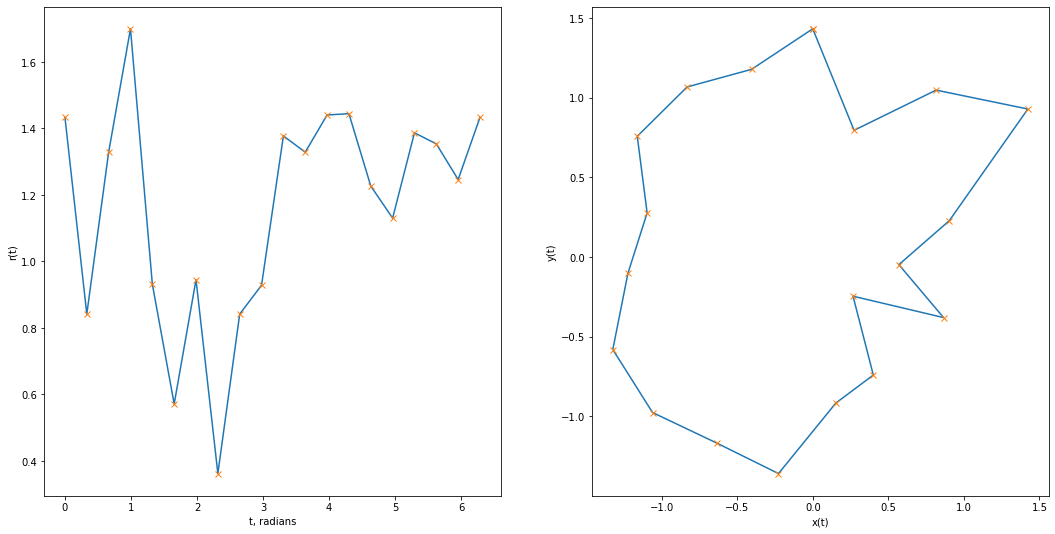

In [20]:
plot_closed_curve(50)

Text(0, 0.5, 'y(t)')

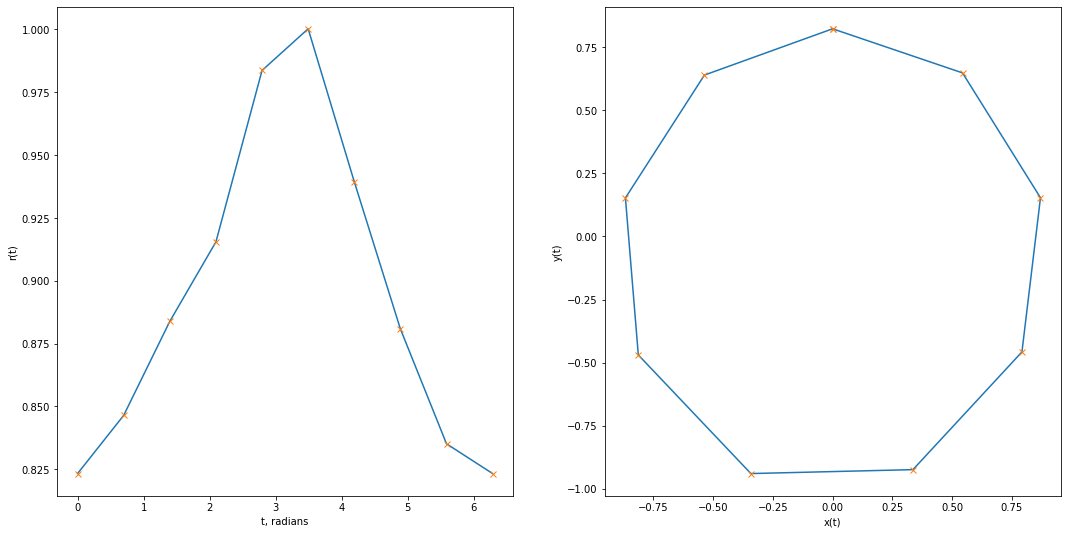

In [21]:
points_number = 5
rho = torch.rand(points_number) * torch.logspace(-0.5, -2.5, points_number)
phi = 2 * torch.pi * torch.rand(points_number)
t = torch.linspace(0, 2 * torch.pi, 10)
r = torch.ones(len(t))
for h in range(points_number):
    r += rho[h] * torch.sin(h * t + phi[h])
x, y = r * torch.sin(t), r * torch.cos(t)
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.plot(t, r, t, r, 'x')
plt.xlabel('t, radians')
plt.ylabel('r(t)')
plt.subplot(1, 2, 2)
plt.plot(x, y, x, y, 'x')
plt.xlabel('x(t)')
plt.ylabel('y(t)')

In [22]:
H = 10
rho = np.random.rand(H)*np.logspace(-0.5,-2.5,H)
phi = np.random.rand(H)* 2*np.pi

t = np.linspace(0,2*np.pi,101)
r = np.ones(len(t))
for h in range(H):
    r = r + rho[h]*np.sin(h*t+phi[h])
x = r * np.cos(t)
y = r * np.sin(t)

Text(0, 0.5, 'y(t)')

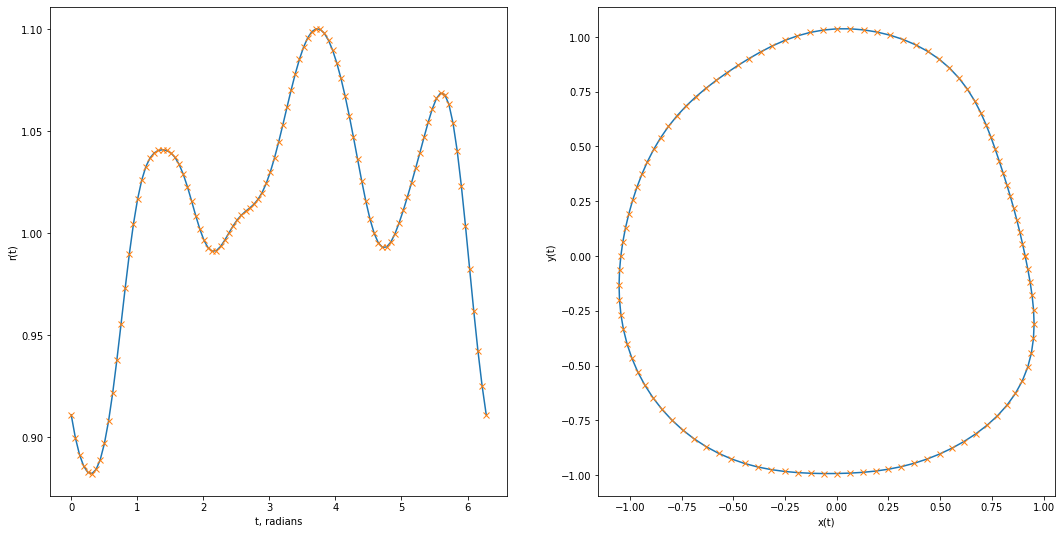

In [23]:
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.plot(t, r, t, r, 'x')
plt.xlabel('t, radians')
plt.ylabel('r(t)')
plt.subplot(1, 2, 2)
plt.plot(x, y, x, y, 'x')
plt.xlabel('x(t)')
plt.ylabel('y(t)')